In [13]:
from Tools.scripts.dutree import display
!pip install diffusers transformers accelerate
!pip install -U xformers torch torchvision torchaudio

In [14]:
!pip install -U --pre triton

ERROR: Could not find a version that satisfies the requirement triton (from versions: none)
ERROR: No matching distribution found for triton


In [2]:
import os
import requests
from dotenv import load_dotenv
from huggingface_hub import login

In [3]:
load_dotenv(override=True)
hf_token = os.getenv('HF_TOKEN')
login(token=hf_token)
os.environ["XFORMERS_DISABLE_TRITON"] = "1"

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


## Will only work on powerful GPUs

In [4]:
# import torch
# from diffusers import FluxPipeline
#
# FLUX_MODEL ="black-forest-labs/FLUX.1-schnell"
#
# pipe = FluxPipeline.from_pretrained(FLUX_MODEL, torch_dtype=torch.bfloat16).to("cuda")
#
# generator = torch.Generator(device="cuda").manual_seed(0)
# prompt = "A futuristic class full of students learning AI coding in the surreal style of Salvador Dali"
# image = pipe(
#     prompt,
#     guidance_scale=0.0,
#     num_inference_steps=3,
#     max_sequence_length=256,
#     generator=generator,
# ).images[0]
#
# image.save("surreal.png")

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

GatedRepoError: 403 Client Error. (Request ID: Root=1-6806843d-0ac414cd1dd7164f3bac9ffd;319bbbf8-5c4a-460f-9b5b-419eae76071b)

Cannot access gated repo for url https://huggingface.co/black-forest-labs/FLUX.1-schnell/resolve/741f7c3ce8b383c54771c7003378a50191e9efe9/text_encoder_2/model-00001-of-00002.safetensors.
Access to model black-forest-labs/FLUX.1-schnell is restricted and you are not in the authorized list. Visit https://huggingface.co/black-forest-labs/FLUX.1-schnell to ask for access.

In [19]:
# Import required libraries
from transformers import pipeline  # Hugging Face's transformers library for pre-trained models
from datasets import load_dataset  # For loading voice embedding datasets
import soundfile as sf  # For saving audio files
import torch  # PyTorch for tensor operations

In [35]:
# Define constants for model and voice embeddings
TTS_MODEL = "microsoft/speecht5_tts"  # Microsoft's SpeechT5 text-to-speech model
EMBEDDING_DATASET = "Matthijs/cmu-arctic-xvectors"  # Dataset containing speaker voice embeddings

# Initialize the text-to-speech pipeline with CUDA acceleration
synthesiser = pipeline(
    task="text-to-speech",
    model=TTS_MODEL,
    device='cuda' if torch.cuda.is_available() else 'cpu'  # Use GPU if available
)

# Load the voice embeddings dataset and select a specific speaker
embeddings_dataset = load_dataset(EMBEDDING_DATASET)
print(embeddings_dataset.keys())  # Output: ['validation']
speaker_embedding = torch.tensor(embeddings_dataset['validation'][7306]["xvector"]).unsqueeze(0)
# unsqueeze(0) adds a batch dimension required by the model

# Generate speech with custom parameters
speech = synthesiser(
    text_inputs="Hi to an artificial intelligence engineer on the way to mastery!",  # Input text
    forward_params={
        "speaker_embeddings": speaker_embedding  # Inject specific speaker characteristics
    }
)

# Save the generated audio to file
sf.write(
    file="speech.wav",
    data=speech["audio"],  # Audio data array
    samplerate=speech["sampling_rate"]  # Preserve original sample rate (usually 16kHz)
)

Device set to use cuda


dict_keys(['validation'])


In [5]:
from IPython.display import Audio

# Play the generated audio
Audio("speech.wav")

## low resource intensive image generation model

In [10]:
import torch
import os
from diffusers import StableDiffusionPipeline
os.environ["XFORMERS_DISABLE_TRITON"] = "1"
model_id = "OFA-Sys/small-stable-diffusion-v0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
pipe.enable_model_cpu_offload()

prompt = "A delicious burger"

image = pipe(prompt).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch C:\Users\ruhit\.cache\huggingface\hub\models--OFA-Sys--small-stable-diffusion-v0\snapshots\38e10e5e71e8fbf717a47a81e7543cd01c1a8140\vae: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\ruhit\.cache\huggingface\hub\models--OFA-Sys--small-stable-diffusion-v0\snapshots\38e10e5e71e8fbf717a47a81e7543cd01c1a8140\vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch C:\Users\ruhit\.cache\huggingface\hub\models--OFA-Sys--small-stable-diffusion-v0\snapshots\38e10e5e71e8fbf717a47a81e7543cd01c1a8140\unet: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\ruhit\.cache\huggingface\hub\models--OFA-Sys--small-stable-diffus

  0%|          | 0/50 [00:00<?, ?it/s]

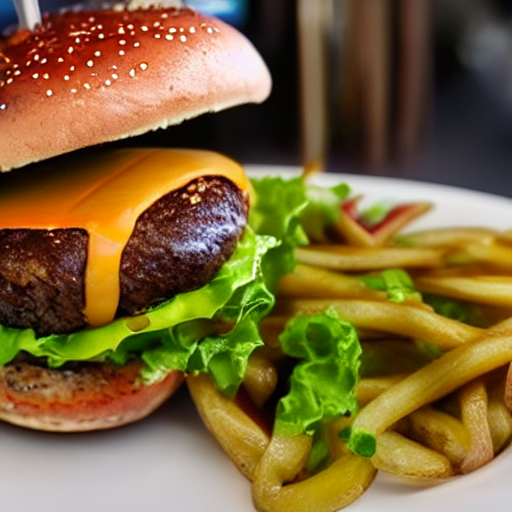

In [11]:
display(image)